In [23]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [40]:
salary_caps = pd.read_csv('salary_cap/salary_cap.csv')

salary_caps['Salary Cap'] = salary_caps['Salary Cap'].str.replace(',', '').str.strip('$').astype(int)
salary_caps['Salary Cap in 2022 Dollars'] = salary_caps['Salary Cap in 2022 Dollars'].str.replace(',', '').str.strip('$').astype(int)
salary_caps['Year'] = salary_caps['Year'].apply(lambda x: x.split('-')[0]).astype(int)
salary_caps.head(5)

,Year,Salary Cap,Salary Cap in 2022 Dollars
0,1984,3600000,9793069
1,1985,4233000,11298280
2,1986,4945000,12734751
3,1987,6164000,15248702
4,1988,7232000,17069461


In [50]:
df = pd.read_csv('salary_cap/MEHOINUSA672N.csv')
df['Year'] = pd.to_datetime(df['DATE']).dt.year
df['Annual Household Income in 2022 Dollars'] = df['MEHOINUSA672N']
df

,DATE,MEHOINUSA672N,Year,Annual Household Income in 2022 Dollars
0,1984-01-01,56780,1984,56780
1,1985-01-01,57860,1985,57860
2,1986-01-01,60010,1986,60010
3,1987-01-01,60760,1987,60760
4,1988-01-01,61210,1988,61210
5,1989-01-01,62260,1989,62260
6,1990-01-01,61500,1990,61500
7,1991-01-01,59710,1991,59710
8,1992-01-01,59210,1992,59210
9,1993-01-01,58920,1993,58920


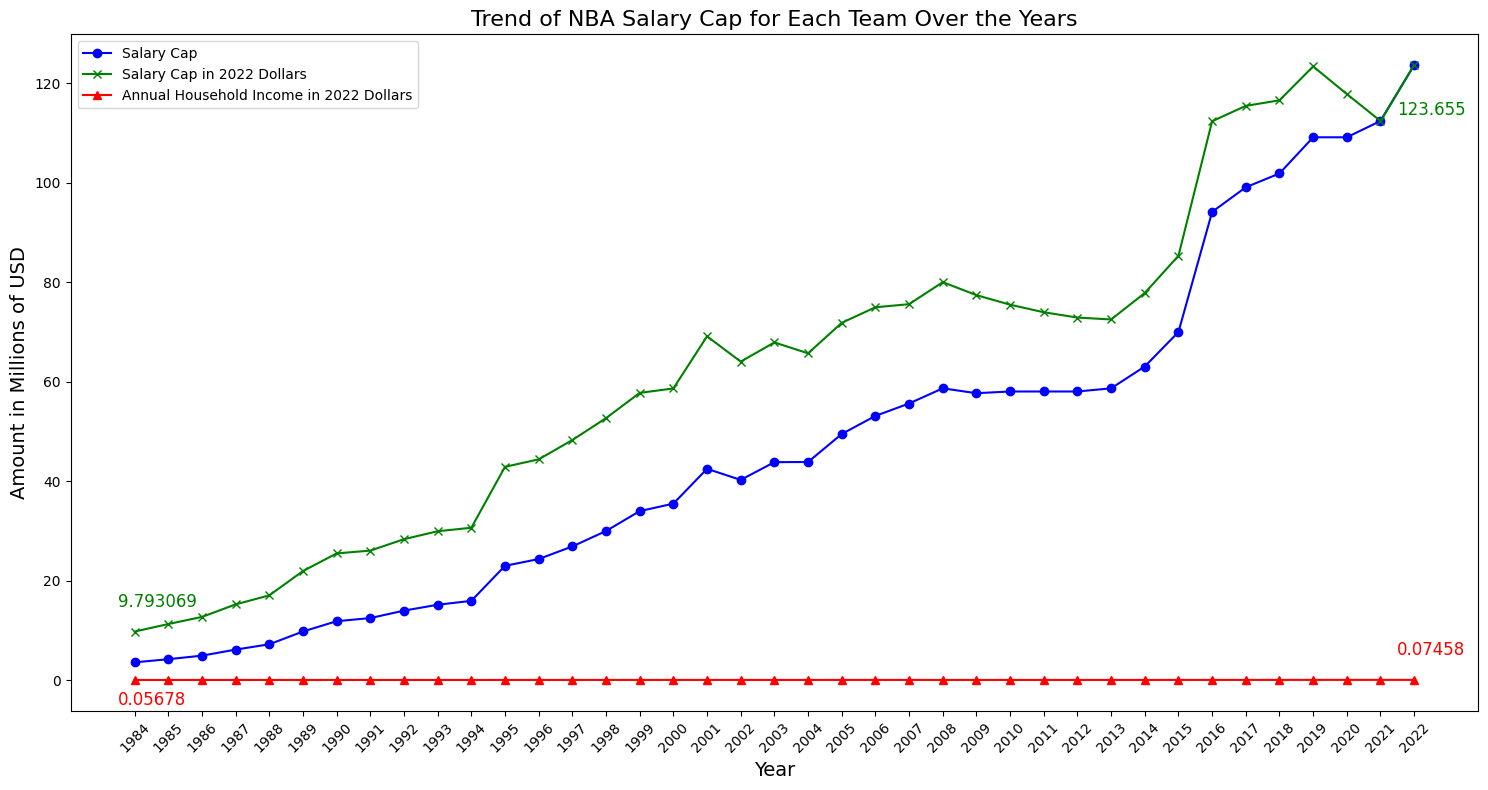

In [84]:

plt.figure(figsize=(15, 8))

plt.plot(salary_caps["Year"], salary_caps["Salary Cap"] / 1_000_000, label="Salary Cap", color="blue", marker='o')
plt.plot(salary_caps["Year"], salary_caps["Salary Cap in 2022 Dollars"] / 1_000_000, label="Salary Cap in 2022 Dollars", color="green", marker='x')

plt.plot(df["Year"], df["Annual Household Income in 2022 Dollars"] / 1_000_000, label="Annual Household Income in 2022 Dollars", color="red", marker='^')

last_year = df["Year"].iloc[-1]
last_salary_cap = salary_caps["Salary Cap in 2022 Dollars"].iloc[-1] / 1_000_000
last_household_income = df["Annual Household Income in 2022 Dollars"].iloc[-1] / 1_000_000

first_year = df["Year"].iloc[0]
first_salary_cap = salary_caps["Salary Cap in 2022 Dollars"].iloc[0] / 1_000_000
first_household_income = df["Annual Household Income in 2022 Dollars"].iloc[0] / 1_000_000

plt.text(last_year - 0.5, last_salary_cap - 10, f"{last_salary_cap:,}", color="green", ha='left', fontdict={'size': 12})
plt.text(last_year - 0.5, last_household_income + 5, f"{last_household_income:,}", color="red", ha='left', fontdict={'size': 12})

plt.text(first_year - 0.5, first_salary_cap + 5, f"{first_salary_cap:,}", color="green", ha='left', fontdict={'size': 12})
plt.text(first_year - 0.5, first_household_income -5, f"{first_household_income:,}", color="red", ha='left', fontdict={'size': 12})



plt.title("Trend of NBA Salary Cap for Each Team Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Amount in Millions of USD", fontsize=14)
plt.xticks(salary_caps["Year"], rotation=45)
plt.yticks(fontsize=10)
# plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()